# 605.621 - Foundations of Algorithms

## The Maximal Clique Problem

Sabbir Ahmed

May 2, 2021

## Introduction

### Background

According to graph theory, a __graph__ can be defined simply as a set of objects (called __nodes__ or vertices) connected together through __edges__. [\[1\]](#references)

A __clique__ of a graph $G$ is a complete subgraph of $G$ such that every two distinct nodes in the clique are adjacent. A __maximal clique__ is a clique that cannot be extended by including one more adjacent nodes [\[2\]](#references).

Consider the following graph:

In [1]:
import random
# import library for constructing and displaying graphs
import networkx as nx
import numpy as np

seed = 0
random.seed(seed)
np.random.seed(seed)

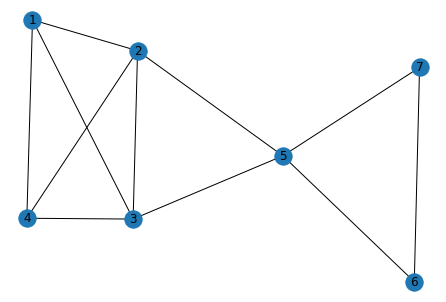

In [2]:
G = nx.Graph()  # instantiate an empty graph
G.add_nodes_from(range(1, 8))  # add 7 nodes
# connect the nodes
G.add_edges_from([
    [1, 2], [1, 3],
    [1, 4], [2, 3],
    [2, 4], [2, 5],
    [3, 4], [3, 5],
    [5, 6], [5, 7],
    [6, 7]
])

# save the x,y coordinates of the graphical representation of the graph to overlay subgraphs in the later cells
pos = nx.spring_layout(G, seed=seed)
# use networkx to draw the graph constructed
nx.draw(G, pos=pos, with_labels=True)

In [3]:
print(f"Graph G has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

Graph G has 7 nodes and 11 edges


For convenience, we begin searching for a clique from the less crowded areas of the graph, nodes 5-6-7.

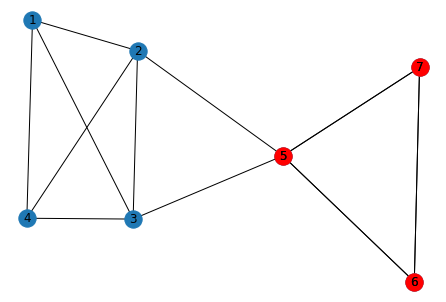

In [4]:
nx.draw(G, pos=pos, with_labels=True)
nx.draw(G.subgraph([5, 6, 7]), pos=pos, with_labels=True, node_color="red")

Those nodes form a closed triangular supgraph and each of the nodes except 5 have two neighbors (2, 3). A __neighbor__ of a node is a node that is connected by at least one edge. The triangular subgraph 5-6-7 is a clique because each of the nodes are neighbors of each other. The clique is maximal because even if vertex 5 has additional neighbors, extending the subgraph to vertex 2, for example, would not make the node neighbors of 6 or 7. The clique is maximal because it cannnot be extended further.

The next set of nodes to observe are the closed triangular subgraph 2-3-5.

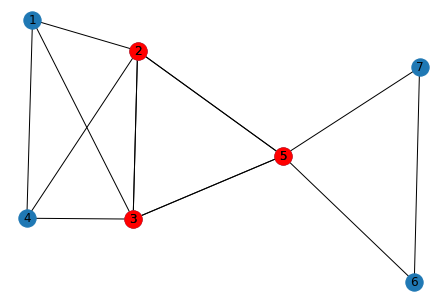

In [5]:
nx.draw(G, pos=pos, with_labels=True)
nx.draw(G.subgraph([2, 3, 5]), pos=pos, with_labels=True, node_color="red")

For the same reasons as 5-6-7, this subgraph cannot be extended with neighbors of certain nodes. Therefore, 2-3-5 is also a maximal clique.

The final set of nodes are 1-2-3-4 that form a closed rectangular subgraph.

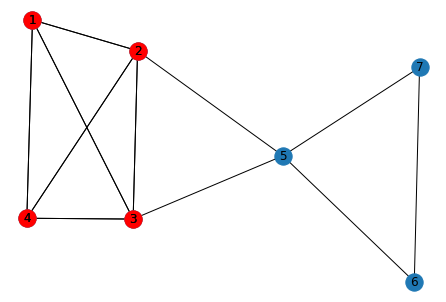

In [6]:
nx.draw(G, pos=pos, with_labels=True)
nx.draw(G.subgraph([1, 2, 3, 4]), pos=pos, with_labels=True, node_color="red")

We observe that each of the nodes are neighbors of each other, i.e. traversing between any two nodes in the subgraph takes a single iteration. This clique is maximal because it cannot be extended further by including other nodes. This maximal clique is also known as the __maximum clique__ of graph $G$ because it contains the maximum number of nodes among all the maximal cliques.

### Algorithm

Finding the maximum number of cliques is a problem that can scale exponentially since there exist graphs with exponentially many maximal cliques. A polynomial time is often not possible if a brute-force approach is taken to find all the cliques. Several algorithms exist to enumerate all the maximal cliques in a graph, including the [Bron–Kerbosch algorithm](https://en.wikipedia.org/wiki/Bron%E2%80%93Kerbosch_algorithm) which performs in $O(3^{n/3})$ time, matching the maximum number of cliques possible in an $n$-node graph. [\[3\]](#references)

```
Bron-Kerbosch(R, P, X)
    if P and X are both empty then
        report R as a maximal clique
    for each vertex v in P do
        Bron-Kerbosch(R ⋃ {v}, P ⋂ N(v), X ⋂ N(v))
        P = P \ {v}
        X = X ⋃ {v}
```

In [7]:
# assign the list of neighbors in the graph to a global variable to avoid passing it every call
N = G.neighbors

In [8]:
def bron_kerbosch(R, P, X):
    """Naive Bron–Kerbosch algorithm"""
    # if possible clique candidates and excluded nodes sets have been exhausted
    if not P and not X:
        # report maximal clique
        print(R)

    # for every nodes
    for v in list(P):
        bron_kerbosch(R | {v}, P & set(N(v)), X & set(N(v)))
        P.remove(v)
        X.add(v)

In [9]:
bron_kerbosch(set(), set(G.nodes()), set())

{1, 2, 3, 4}
{2, 3, 5}
{5, 6, 7}


The naive Bron Kerbosch algorithm is however not very efficient with many non-maximal cliques. The algorithm makes a recursive call for every clique, maximal or not. A variation of the algorithm exists with a pivot vertex to more quickly backtrack in branches of the search that contain no maximal cliques.

```
Bron-Kerbosch-Pivot(R, P, X)
    if P and X are both empty then
        report R as a maximal clique
    choose a pivot vertex u in P ⋃ X
    for each vertex v in P \ N(u) do
        Bron-Kerbosch-Pivot(R ⋃ {v}, P ⋂ N(v), X ⋂ N(v))
        P := P \ {v}
        X := X ⋃ {v}
```

In [10]:
def pop(s):
    """Pop from the set `s`

    This utility function is utilized in choosing "any" vertex from a set. In
    this notebook, only unions, intersections and differences of sets are
    inputted. Popping from those sets do not affect the original sets.
    
    Args:
        s <set(int)>: set of integer nodes
        
    Returns:
        <int>: node popped from set
    """
    if s:
        return s.pop()


def bron_kerbosch_pivot(R, P, X):
    """Bron–Kerbosch algorithm with pivot"""
    # if possible clique candidates and excluded nodes sets have been exhausted
    if not P and not X:
        # report maximal clique
        print(R)
        return

    # some vertex in P | X
    pivot = pop(P | X)

    # for every nodes
    for v in list(P - set(N(pivot))):
        bron_kerbosch_pivot(R | {v}, P & set(N(v)), X & set(N(v)))
        P.remove(v)
        X.add(v)

In [11]:
bron_kerbosch_pivot(set(), set(G.nodes()), set())

{1, 2, 3, 4}
{2, 3, 5}
{5, 6, 7}


Two versions of the Bron-Kerbosch algorithm have now been implemented. However, the cliques are being flushed to the output as soon as they are found and not saved for later reference. A list variable can be passed in the recursive functions to store the cliques. An additional variable can also be included to count the number of recursions per algorithm.

In [12]:
class RecursionReporter():
    
    def __init__(self):
        """Helper class to keep track of attributes of the recursive functions"""        
        # list of maximal cliques found
        self.cliques = []
        # number of maximal cliques found
        self.num_cliques  = 0
        # number of recursive calls made
        self.num_recursions = 0
        
    def inc(self):
        """Increment the number of recursive calls made"""
        self.num_recursions += 1
        
    def append(self, clique):
        """Add maximal clique to the list of cliques"""
        self.cliques.append(clique)
        self.num_cliques += 1
        
    def report_agg(self):
        """Report the aggregated statistics"""
        print(f"Total number of recursive calls: {self.num_recursions}")
        print(f"Total number of cliques found: {self.num_cliques}")

    def report(self):
        """Report the aggregated statistics and list out all the cliques found"""        
        self.report_agg()
        for clique in self.cliques:
            print(clique)

In [13]:
def bron_kerbosch(R, P, X, reporter):
    """Naive Bron–Kerbosch algorithm"""
    reporter.inc()
    if not P and not X:
        reporter.append(R)

    for v in list(P):
        bron_kerbosch(R | {v}, P & set(N(v)), X & set(N(v)), reporter)
        P.remove(v)
        X.add(v)

In [14]:
def bron_kerbosch_pivot(R, P, X, reporter):
    """Bron–Kerbosch algorithm with pivot"""
    reporter.inc()
    if not P and not X:
        reporter.append(R)
        return

    # some vertex in P | X
    pivot = pop(P | X)

    # for every nodes
    for v in list(P - set(N(pivot))):
        bron_kerbosch_pivot(R | {v}, P & set(N(v)), X & set(N(v)), reporter)
        P.remove(v)
        X.add(v)

In [15]:
reporter = RecursionReporter()
bron_kerbosch(set(), set(G.nodes()), set(), reporter)
reporter.report()

Total number of recursive calls: 26
Total number of cliques found: 3
{1, 2, 3, 4}
{2, 3, 5}
{5, 6, 7}


In [16]:
reporter = RecursionReporter()
bron_kerbosch_pivot(set(), set(G.nodes()), set(), reporter)
reporter.report()

Total number of recursive calls: 13
Total number of cliques found: 3
{1, 2, 3, 4}
{2, 3, 5}
{5, 6, 7}


It can be observed that the algorithm implementing the pivot search performs better in terms of the number of recursive calls. This is true for graphs with relatively smaller numbers of maximal cliques. However, graphs with very large numbers of maximal cliques may lead the functions to exceed the maximum recursion depths.

The recursive Born Kerbosch algorithms can be converted to iterative versions. The iterative versions of the functions eliminate any chances of exceeding recursion depths and simplify calculations of the time and space complexities.

In [17]:
def bron_kerbosch_iter(R, P, X):
    """Iterative Bron–Kerbosch algorithm"""
    cliques = []
    num_iters = 0
    S = []
    S.append((set(), P, set()))

    while len(S):
        num_iters += 1
        R, P, X = S.pop()
        if not P and not X:
            cliques.append(R)

        if P:
            v = P.pop()
            S.append((R, P, X | {v}))
            S.append((R | {v}, P & set(N(v)), X & set(N(v))))

    return num_iters, cliques

In [18]:
def bron_kerbosch_pivot_iter(R, P, X):
    """Iterative Bron–Kerbosch algorithm with pivot"""
    cliques = []
    num_iters = 0
    S = []
    S.append((set(), P, set()))

    while len(S):
        num_iters += 1
        R, P, X = S.pop()
        if not P and not X:
            cliques.append(R)

        pivot = pop(P | X)

        if pivot:
            v = pop(P - set(N(pivot)))
            if v:
                P.remove(v)
                S.append((R, P, X | {v}))
                S.append((R | {v}, P & set(N(v)), X & set(N(v))))

    return num_iters, cliques

In [19]:
num_iters, cliques = bron_kerbosch_iter(set(), set(G.nodes()), set())
print(f"Total iterations: {num_iters}")
print(f"Total number of cliques found: {len(cliques)}")
for clique in cliques:
    print(clique)

Total iterations: 51
Total number of cliques found: 3
{1, 2, 3, 4}
{2, 3, 5}
{5, 6, 7}


In [20]:
num_iters, cliques = bron_kerbosch_pivot_iter(set(), set(G.nodes()), set())
print(f"Total iterations: {num_iters}")
print(f"Total number of cliques found: {len(cliques)}")
for clique in cliques:
    print(clique)

Total iterations: 25
Total number of cliques found: 3
{1, 2, 3, 4}
{2, 3, 5}
{5, 6, 7}


## Complexity Analysis

For this project, only the recursive version of the Bron Kerbosch algorithm with pivoting will be analyzed. Consider the breakdown of the function with their individual time complexities:

```
def bron_kerbosch_pivot(R, P, X):
    if not P and not X:                     # O(1)
        print(R)                            # O(1)
        return

    pivot = pop(P | X)                      # O(|P|+|X|)

    P1 = P - set(N(pivot))                  # O(|P|)
    P1 = list(P1)                           # O(|P|)
    for v in P1:                            # O(|P|)
        R1 = R | {v}                        # O(|R|)
        P2 = P & set(N(v))                  # O(min(|P|,|N|))
        X1 = X & set(N(v))                  # O(min(|X|,|N|))
        bron_kerbosch_pivot(R1, P2, X1)     # O(1)
        P.remove(v)                         # O(1)
        X.add(v)                            # O(1)
```

### Time complexity
The depth of the recursion tree increases depending on the number of nodes per each sets $R$, $P$ and $X$. As mentioned earlier, the maximum number of maximal cliques in a graph of $n$ nodes is $3^{n/3}$, which is the worst case runtime of this algorithm.

### Space complexity
The worst case space complexity of the algorithm is $O(|P|\cdot max(min(|P|,|N|), min(|X|,|N|)))$. Since on average $|P| \approx |X| \approx |N|$, the complexity can be simplified to $O(n^2)$.

## Empirical Analysis

In order to measure the performance of the algorithm, several utility functions are required. We can incorporate the Bron Kerbosch algorithm into a class that generates random graphs and provides additional functionality.

In [21]:
class GraphGenerator():
    
    def __init__(self, n):
        """Generate a random undirected graph of `n` nodes and `n` < x < `n` * 5 edges and
        provide methods to find all the maximal and maximum cliques.

        Args:
            n <int>: number of nodes for the random graph
        """
        # number of nodes in the graph
        self.n = n

        # list of maximal cliques found
        self.cliques = []

        # number of recursive calls made
        self.num_recursions = 0

        # generate a random number between n and 5n
        self.e = np.random.randint(self.n, self.n * 5)

        # generate a random graph of n nodes and e edges
        self.G = nx.gnm_random_graph(self.n, self.e)

        # remove the 0th node to avoid ambiguous interpretations in the algorithm
        self.G.remove_node(0)

        # save the neighbor nodes as a member variable
        self.N = self.G.neighbors

    def find_cliques(self):
        """Initialize the Bron Kerbosch algorithm to start finding all cliques"""
        self.bron_kerbosch_pivot(set(), set(self.G.nodes()), set())

    @staticmethod
    def pop(s):
        """Pop from the set `s`

        This utility function is utilized in choosing "any" vertex from a set. In
        this notebook, only unions, intersections and differences of sets are
        inputted. Popping from those sets do not affect the original sets.

        Args:
            s <set(int)>: set of integer nodes

        Returns:
            <int>: node popped from set
        """
        if s:
            return s.pop()
        
    def bron_kerbosch_pivot(self, R, P, X):
        """Bron–Kerbosch algorithm with pivot"""
        self.num_recursions += 1
        if not P and not X:
            self.cliques.append(R)
            return

        # some vertex in P | X
        pivot = self.pop(P | X)

        # for every nodes
        for v in list(P - set(self.N(pivot))):
            self.bron_kerbosch_pivot(R | {v}, P & set(self.N(v)), X & set(self.N(v)))
            P.remove(v)
            X.add(v)

    def gen_stats(self):
        
        self.num_cliques = len(self.cliques)
        self.max_clique_len = len(max(self.cliques, key=lambda x: len(x)))
        self.max_cliques = [x for i, x in enumerate(self.cliques) if len(x) == self.max_clique_len]
        self.num_max_cliques = len(self.max_cliques)
            
    def report(self):
        """Report the statistics and list all the cliques found"""        
        print(f"Total number of recursive calls: {self.num_recursions}\n")
        print(f"Total number of cliques found: {self.num_cliques}")
        print("Maximal cliques found:")
        for clique in self.cliques:
            print(clique)

        print(f"\nLength of the maximum clique(s): {self.max_clique_len}")
        print(f"Number of maximum clique(s) found: {self.num_max_cliques}")
        print("Maximum cliques found:")
        for clique in self.max_cliques:
            print(clique)

Testing out the class constructed:

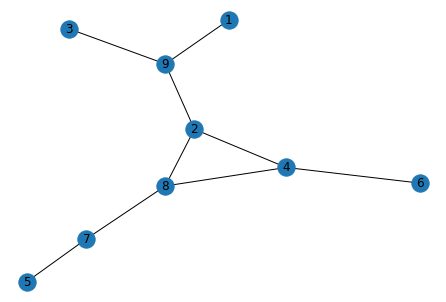

In [22]:
graph = GraphGenerator(10)
nx.draw(graph.G, with_labels=True)

In [23]:
graph.find_cliques()
graph.gen_stats()
graph.report()

Total number of recursive calls: 18

Total number of cliques found: 7
Maximal cliques found:
{1, 9}
{8, 2, 4}
{9, 2}
{9, 3}
{4, 6}
{5, 7}
{8, 7}

Length of the maximum clique(s): 3
Number of maximum clique(s) found: 1
Maximum cliques found:
{8, 2, 4}


Now, statistics can be generated on the number of recursions as the size of the graph increases.

In [24]:
# lists to store graph variables
num_recursions = []
num_cliques = []
max_clique_len = []
num_max_cliques = []
num_edges = []
num_nodes_list = range(1, 6)
for i in num_nodes_list:

    # scale number of nodes exponentially
    num_nodes = 10**i

    # temporary lists
    _num_recursions = []
    _num_cliques = []
    _max_clique_len = []
    _max_cliques = []
    _num_max_cliques = []
    _num_edges = []

    # generate 10 graphs of `n` nodes
    for _ in range(10):
        graph = GraphGenerator(num_nodes)
        graph.find_cliques()
        graph.gen_stats()
        # take log10 of exponentially increasing variables
        _num_recursions.append(np.log10(graph.num_recursions))
        _num_cliques.append(np.log10(graph.num_cliques))
        _max_clique_len.append(graph.max_clique_len)
        _num_max_cliques.append(graph.num_max_cliques)
        _num_edges.append(np.log10(graph.e))

    num_recursions.append(_num_recursions)
    num_cliques.append(_num_cliques)
    max_clique_len.append(_max_clique_len)
    num_max_cliques.append(_num_max_cliques)
    num_edges.append(_num_edges)

Plotting the statistics by first importing the visualization libraries:

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")

Visualizing the log-log relationship between the number of nodes in a graph with the number of recursive calls made by the clique searching algorithm:

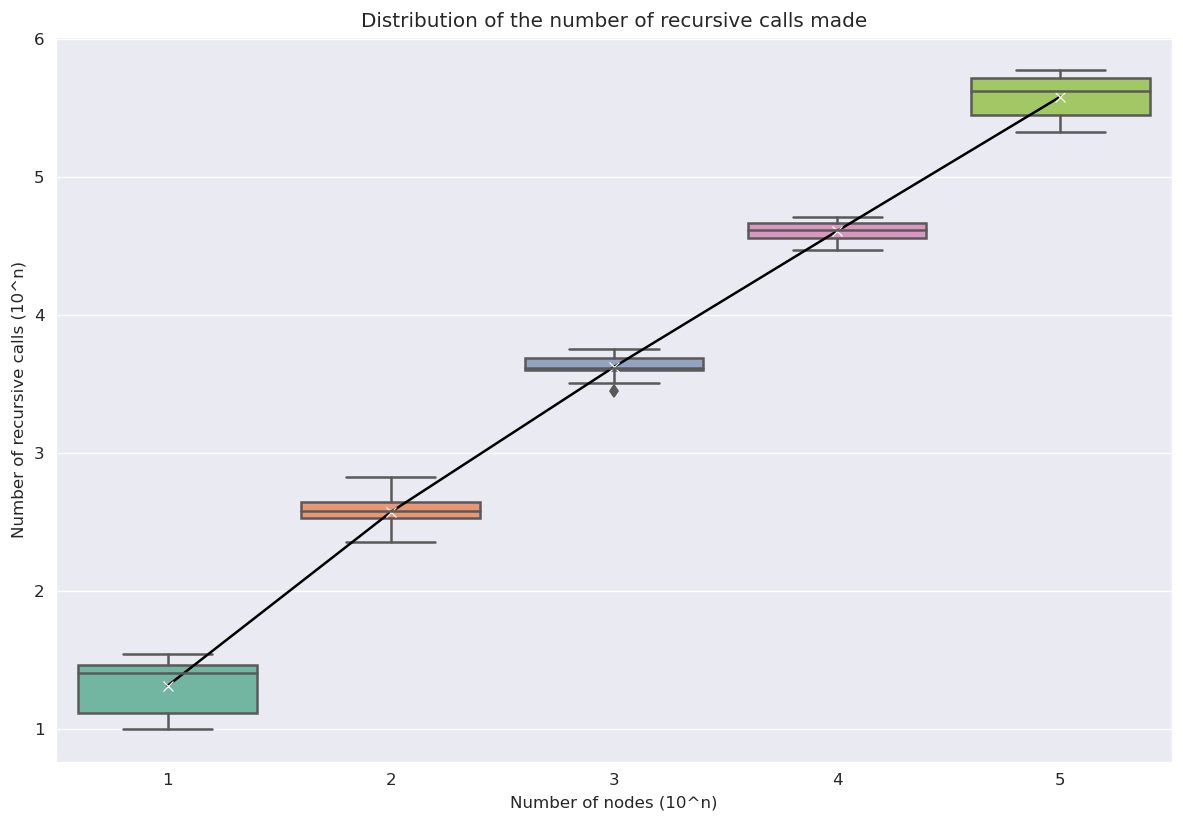

In [26]:
fig = plt.figure(figsize=(12, 8), dpi=120)

# generate boxplots of the log10 of the number of recursive calls
sns.boxplot(data=num_recursions, palette=sns.color_palette("Set2"))
# generate a line plot of the mean of the log10 of the number of recursive calls 
sns.lineplot(data=[np.mean(i) for i in num_recursions], marker="x", color="black")

plt.xlabel("Number of nodes (10^n)")
plt.ylabel("Number of recursive calls (10^n)")
plt.xticks(plt.xticks()[0], num_nodes_list)
plt.title("Distribution of the number of recursive calls made");

It can be observed that there is a linear relationship between the number of nodes in a graph and the number of recursive calls made. 

Another interesting observation can be made by visualizing the lengths of the maximum cliques of the increasing graph sizes. Obviously, a larger graph is bound to have a larger maximum clique. However, the range of the lengths of the maximum cliques also increase with the number of nodes.

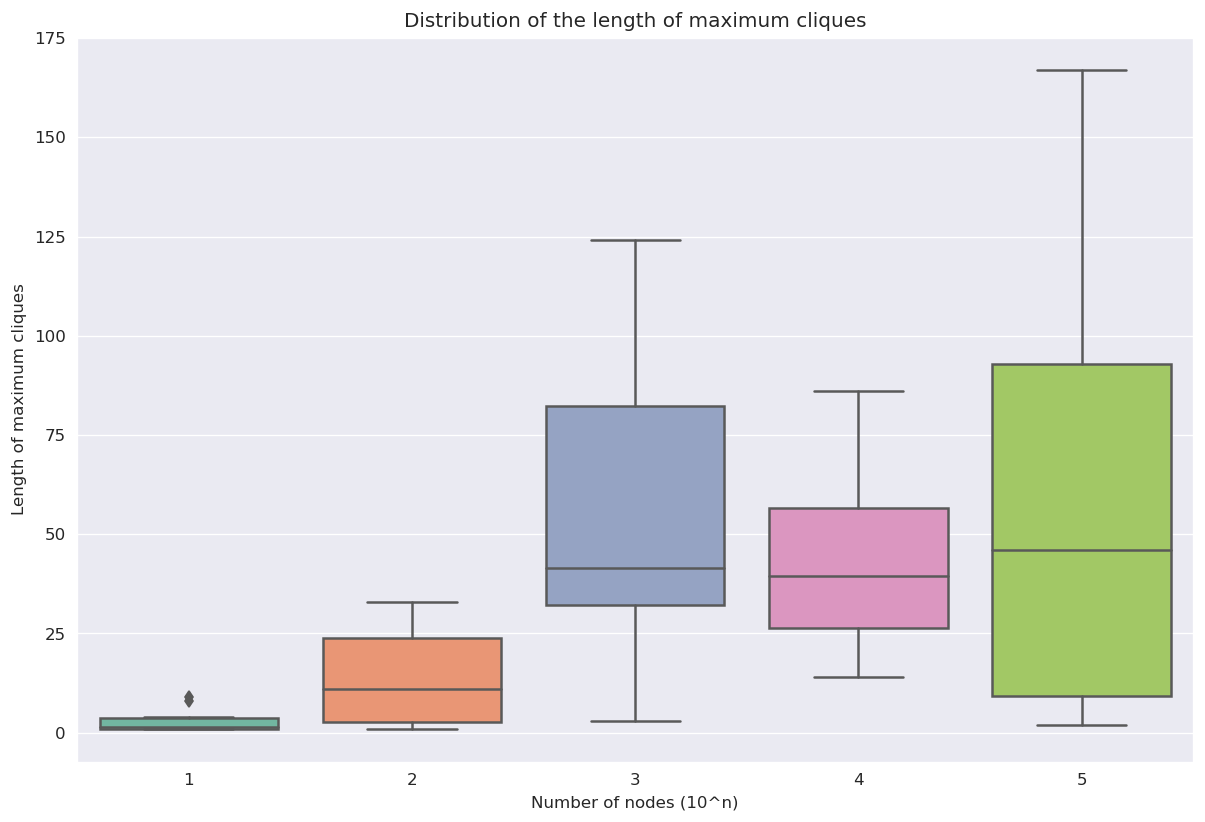

In [27]:
fig = plt.figure(figsize=(12, 8), dpi=120)

# generate boxplots of the lengths of the maximum cliques
sns.boxplot(data=num_max_cliques, palette=sns.color_palette("Set2"))

plt.xlabel("Number of nodes (10^n)")
plt.ylabel("Length of maximum cliques")
plt.xticks(plt.xticks()[0], num_nodes_list)
plt.title("Distribution of the length of maximum cliques");

<a id="references"></a>
## References

[1] “Directed and Undirected Graphs.” Directed and Undirected Graphs - MATLAB &amp; Simulink, www.mathworks.com/help/matlab/math/directed-and-undirected-graphs.html.

[2] “Clique.” From Wolfram MathWorld, mathworld.wolfram.com/Clique.html. 

[3] Moon, J., & Moser, L. (1965). On cliques in graphs. Israel Journal of Mathematics, 3, 23-28.